In [ ]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

%matplotlib inline

from NFW import NFW

In [ ]:
전data = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf_dm_5e8_0290.txt")

# 전 is the Hangul character for the surname Jeon of the data gatherer!
# it's just my linguistics side being quirky and I'm glad Jupyter Notebook supports Hangul characters like this!

In [ ]:
dx = 전data[:,4]
# collect the 4th element of each row in the array into a massive array

dy = 전data[:,5]
# collect the 5th element of each row in the array into a massive array

dz = 전data[:,6]
# collect the 6th element of each row in the array into a massive array

In [82]:
# Code for plotting contours
#from https://gist.github.com/adrn/3993992

import scipy.optimize as so

def find_confidence_interval(x, pdf, confidence_level):
    return pdf[pdf > x].sum() - confidence_level

#https://book.pythontips.com/en/latest/args_and_kwargs.html
def density_contour(xdata, ydata, nbins_x, nbins_y, ax=None, **contour_kwargs):
    """ Create a density contour plot.
    Parameters
    ----------
    xdata : numpy.ndarray
    ydata : numpy.ndarray
    nbins_x : int
        Number of bins along x dimension
    nbins_y : int
        Number of bins along y dimension
    ax : matplotlib.Axes (optional)
        If supplied, plot the contour to this axis. Otherwise, open a new figure
    contour_kwargs : dict
        kwargs to be passed to pyplot.contour()
        
    Example Usage
    -------------
     density_contour(x pos, y pos, contour res, contour res, axis, colors for contours)
     e.g.:
     density_contour(xD, yD, 80, 80, ax=ax, colors=['red','orange', 'yellow', 'orange', 'yellow'])

    """

    H, xedges, yedges = np.histogram2d(xdata, ydata, bins=(nbins_x,nbins_y), normed=True)
    x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1,nbins_x))
    y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((nbins_y,1))

    pdf = (H*(x_bin_sizes*y_bin_sizes))
    
    X, Y = 0.5*(xedges[1:]+xedges[:-1]), 0.5*(yedges[1:]+yedges[:-1])
    Z = pdf.T
    fmt = {}
    
    ### Adjust Here #### 
    
    # Contour Levels Definitions
    one_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.68))
    two_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.95))
    three_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.99))
    
    # You might need to add a few levels
    one_sigma1 = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.80))
    one_sigma2 = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.90))

    # Array of Contour levels. Adjust according to the above
    levels = [one_sigma, one_sigma1, one_sigma2, two_sigma, three_sigma][::-1]
    
    # contour level labels  Adjust accoding to the above.
    strs = ['0.68','0.8', '0.9','0.95', '0.99'][::-1]

    
    ###### 
    
    if ax == None:
        contour = plt.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        plt.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)

    else:
        contour = ax.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        ax.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)
    
    return contour

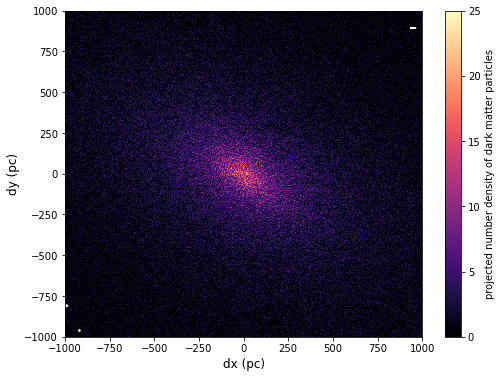

In [83]:
# plt.figure(figsize=(8,6))
fig, ax=plt.subplots(figsize=(8,6))

plt.hist2d(dx, dy, bins=4000, cmap='magma') # this plots dx and dy
plt.colorbar(mappable=None, cax=None, ax=None, label='projected number density of dark matter particles')
density_contour(dx, dy, 900, 900, ax=ax, colors=['yellow','white','white','white','white'])

plt.xlabel('dx (pc)', fontsize=12)
plt.ylabel('dy (pc)', fontsize=12)
plt.xlim(-1000,1000)
plt.ylim(-1000,1000)

plt.savefig("plot1_dx_dy.png")

plt.show()

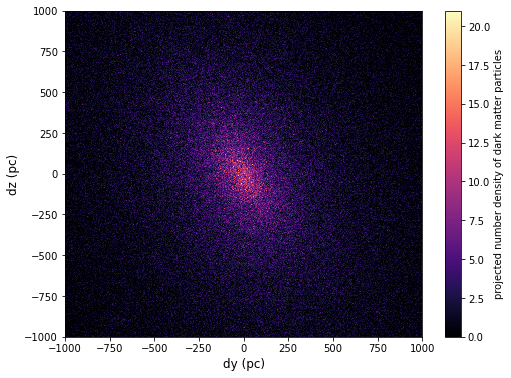

In [84]:
plt.figure(figsize=(8,6))

plt.hist2d(dy, dz, bins=(4000, 4000), cmap='magma') # this plots dy and dz
plt.colorbar(mappable=None, cax=None, ax=None, label='projected number density of dark matter particles')

plt.xlabel('dy (pc)', fontsize=12)
plt.ylabel('dz (pc)', fontsize=12)
plt.xlim(-1000,1000)
plt.ylim(-1000,1000)

plt.savefig("plot2_dy_dz.png")

plt.show()

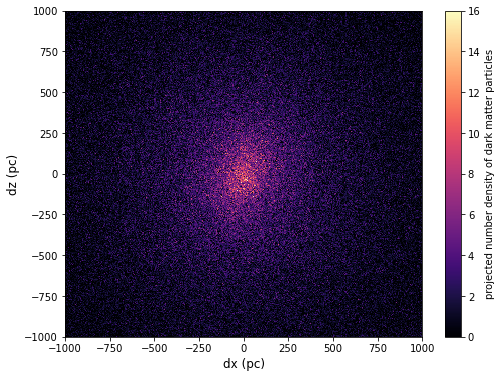

In [85]:
plt.figure(figsize=(8,6))

plt.hist2d(dx, dz, bins=(4000, 4000), cmap='magma') # this plots dx and dz
plt.colorbar(mappable=None, cax=None, ax=None, label='projected number density of dark matter particles')

plt.xlabel('dx (pc)', fontsize=12)
plt.ylabel('dz (pc)', fontsize=12)
plt.xlim(-1000,1000)
plt.ylim(-1000,1000)

plt.savefig("plot3_dx_dz.png")

plt.show()

In [86]:
r = np.sqrt(dx**2 + dy**2 + dz**2)
# this array contains each value of radius range

# the max value in the r array is 11333.935323605565
# with this in mind, I want to find how many particles there are in each spherical shell of dr = 90 pc
# for the first spherical shell, the upper bound is 0 pc and the lower bound is 90 pc
# both of these values will increase by 90 pc as we go further outward, before ending at 11250 pc and 11340 pc, respectively
# this gradual incrementation justifies the use of the while loop here

density_profile = []
radius_array = []
lower_bound = 0
upper_bound = 90

while lower_bound <= 11250 and upper_bound <= 11340:
    radius_array.append(lower_bound)
    particles = np.where((r > lower_bound) & (r < upper_bound))
    how_many_particles = np.shape(particles)[1]
    # this is because in the array that's made, index = 0 will be the number of columns, which is 1,
    # and index = 1 is the number of rows, which is what we need    
    shell_volume = (4/3)*np.pi*(upper_bound**3 - lower_bound**3)
    profile_by_range = how_many_particles / shell_volume
    density_profile.append(profile_by_range)
    lower_bound += 90
    upper_bound += 90
    
density_profile = np.array(density_profile)
radius_array = np.array(radius_array)

In [ ]:
plt.figure(figsize=(8,8))

plt.plot(radius_array, density_profile)
plt.xlabel('distance from center of galaxy halo (pc)')
plt.ylabel(r'dark matter particle density profile (particles/pc$^3$)') # using LATEX here!
plt.xscale('log')
plt.yscale('log')

plt.show()